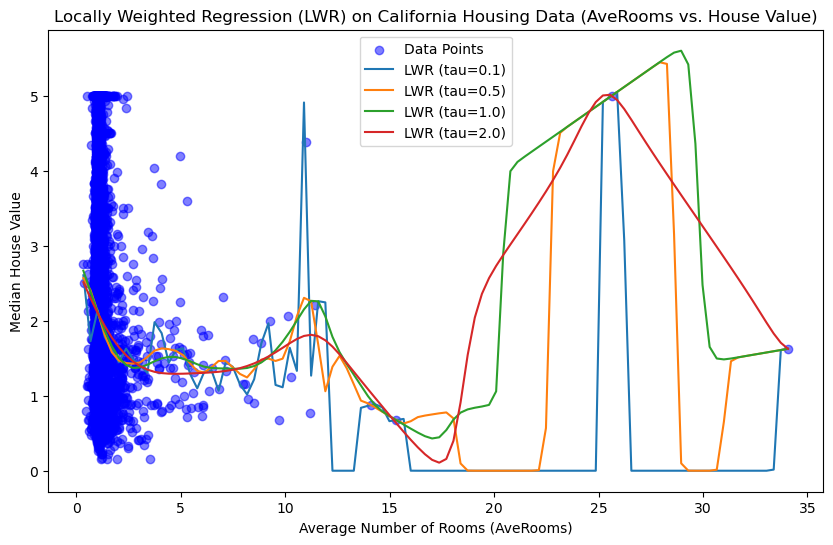

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing


# Step 1: Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data[:, 3].reshape(-1, 1)  # Use the 'AveRooms' feature (average number of rooms)
y = california_housing.target  # Target variable (median house value)

# Step 2: Define the Locally Weighted Regression function with regularization
def locally_weighted_regression(X_train, y_train, X_test, tau=1.0, epsilon=1e-5):
    m = len(X_train)
    y_pred = np.zeros(len(X_test))
    
    for i, x in enumerate(X_test):
        x = x[0]  # Extract scalar value from the 2D array
        # Compute the weight matrix (Gaussian kernel)
        weights = np.exp(-np.sum((X_train - x)**2, axis=1) / (2 * tau**2))
        W = np.diag(weights)
        
        # Solve the weighted least squares problem: (X^T W X + epsilon I) (theta) = (X^T W y)
        X_train_augmented = np.hstack((np.ones((m, 1)), X_train))  # Add bias term (x0 = 1)
        XTX = X_train_augmented.T @ W @ X_train_augmented
        XTX_reg = XTX + epsilon * np.eye(X_train_augmented.shape[1])  # Add regularization term
        theta = np.linalg.inv(XTX_reg) @ (X_train_augmented.T @ W @ y_train)
        
        # Make the prediction for the test point
        X_test_augmented = np.array([1, x])  # Add bias term (x0 = 1)
        y_pred[i] = X_test_augmented @ theta
    
    return y_pred

# Step 3: Generate predictions on a range of test values
X_test = np.linspace(min(X), max(X), 100).reshape(-1, 1)

# Step 4: Perform Locally Weighted Regression for different tau values
tau_values = [0.1, 0.5, 1.0, 2.0]
plt.figure(figsize=(10, 6))

# Scatter plot of the original data
plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')

# Perform LWR and plot for different tau values
for tau in tau_values:
    y_pred = locally_weighted_regression(X, y, X_test, tau)
    plt.plot(X_test, y_pred, label=f'LWR (tau={tau})')

# Step 5: Customize the plot
plt.title("Locally Weighted Regression (LWR) on California Housing Data (AveRooms vs. House Value)")
plt.xlabel("Average Number of Rooms (AveRooms)")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

C:\Users\salma\AppData\Local\Temp\ipykernel_8912\1437916882.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
C:\Users\salma\AppData\Local\Temp\ipykernel_8912\1437916882.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)


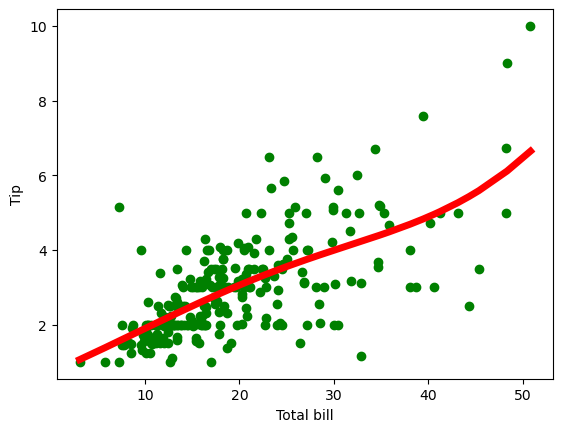

In [3]:


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point,xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m))) # eye - identity matrix
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

def graphPlot(X,ypred):
    sortindex = X[:,1].argsort(0) #argsort - index of the smallest
    xsort = X[sortindex][:,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(bill,tip, color='green')
    ax.plot(xsort[:,1],ypred[sortindex], color = 'red', linewidth=5)
    plt.xlabel('Total bill')
    plt.ylabel('Tip')
    plt.show();
# load data points
data = pd.read_csv('10data_tips.csv')
bill = np.array(data.total_bill) # We use only Bill amount and Tips data
tip = np.array(data.tip)
mbill = np.mat(bill) # .mat will convert nd array is converted in 2D array
mtip = np.mat(tip)
m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T)) # 244 rows, 2 cols
ypred = localWeightRegression(X,mtip,10) # increase k to get smooth curves
graphPlot(X,ypred)
